## Reto 2: Variaciones de scatterplots

### 1. Objetivos:
    - Aprender a generar e interpretar un par de variantes de las gráficas de dispersión

---
    
### 2. Desarrollo:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import userdata

### a) Explorando determinantes de calidad en vinos rojos

Vamos a utilizar el dataset 'wine_quality_red-clean.csv' para ver si podemos descubrir algunas de las características que hacen que un vino tenga más o menos calidad.

Cada fila en el dataset contiene información acerca de un tipo de vino y una clasificación de calidad ('quality'). Queremos explorar un poco las relaciones entre las variables independientes para ver si hay alguna relación que explique un poco la diferencia de calidad.

Tu Reto consiste en lo siguiente:

1. Elige un par de variables independientes que creas que podrían explicar la calidad de un vino.
2. Genera un scatterplot por categorías utilizando las dos variables que elegiste y la variable 'quality' para determinar el color de tus puntos. Asegúrate de que tu gráfica tenga el título y nombres de ejes adecuados. Elige también una paleta de colores que te sean agradables.
3. Utilizando esta gráfica, evalúa si crees que la relación entre estas dos variables explica aunque sea moderamente la diferencia de calidad en los vinos. Si no crees que las variables expliquen la calidad en lo más mínimo, repite los pasos 1 y 2 usando un par distinto de variables.
4. Una vez que encuentres un par de variables que expliquen moderadamente la calidad del vino (remarco la palabra 'moderadamente'), genera una serie de scatterplots con variable condicionante para explorar más a detalle la relación. Realiza una gráfica por cada puntaje de calidad. Asegúrate de que cada gráfica tenga el nombre adecuado y de que todo el conjunto sea agradable a la vista y fácil de interpretar.
5. Comenta con tus compañeros y la experta tus hallazgos.

In [ ]:
ruta = userdata.get('ruta')

df = pd.read_csv(ruta + 'wine_quality_red-clean.csv', index_col=0)

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


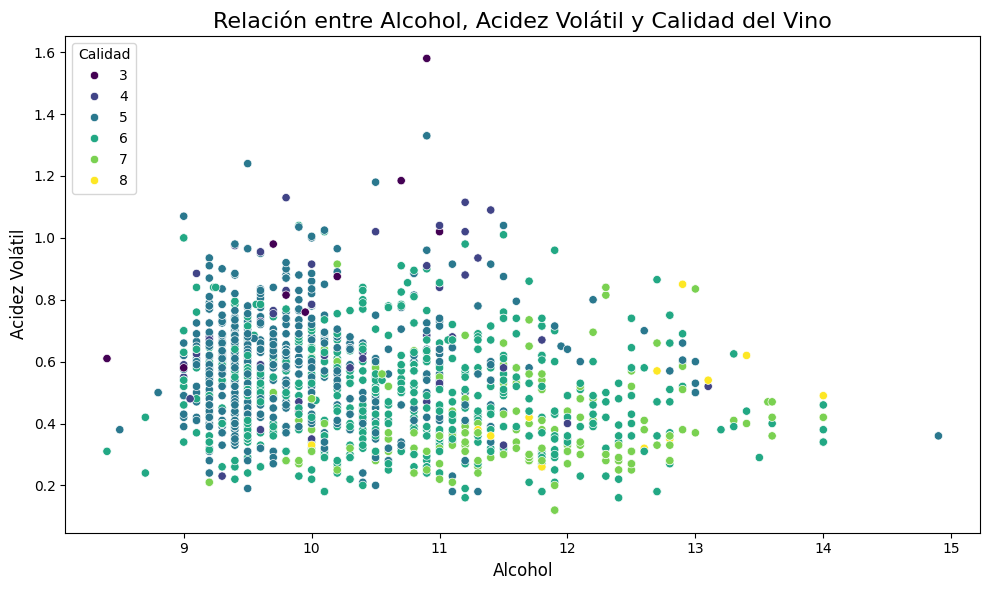

In [ ]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='alcohol',
    y='volatile_acidity',
    hue='quality',
    palette='viridis'
)

# Añadir título y etiquetas
plt.title('Relación entre Alcohol, Acidez Volátil y Calidad del Vino', fontsize=16)
plt.xlabel('Alcohol', fontsize=12)
plt.ylabel('Acidez Volátil', fontsize=12)

# Mostrar la leyenda
plt.legend(title='Calidad', loc='upper left')

# Ajustar el layout
plt.tight_layout()
plt.show()

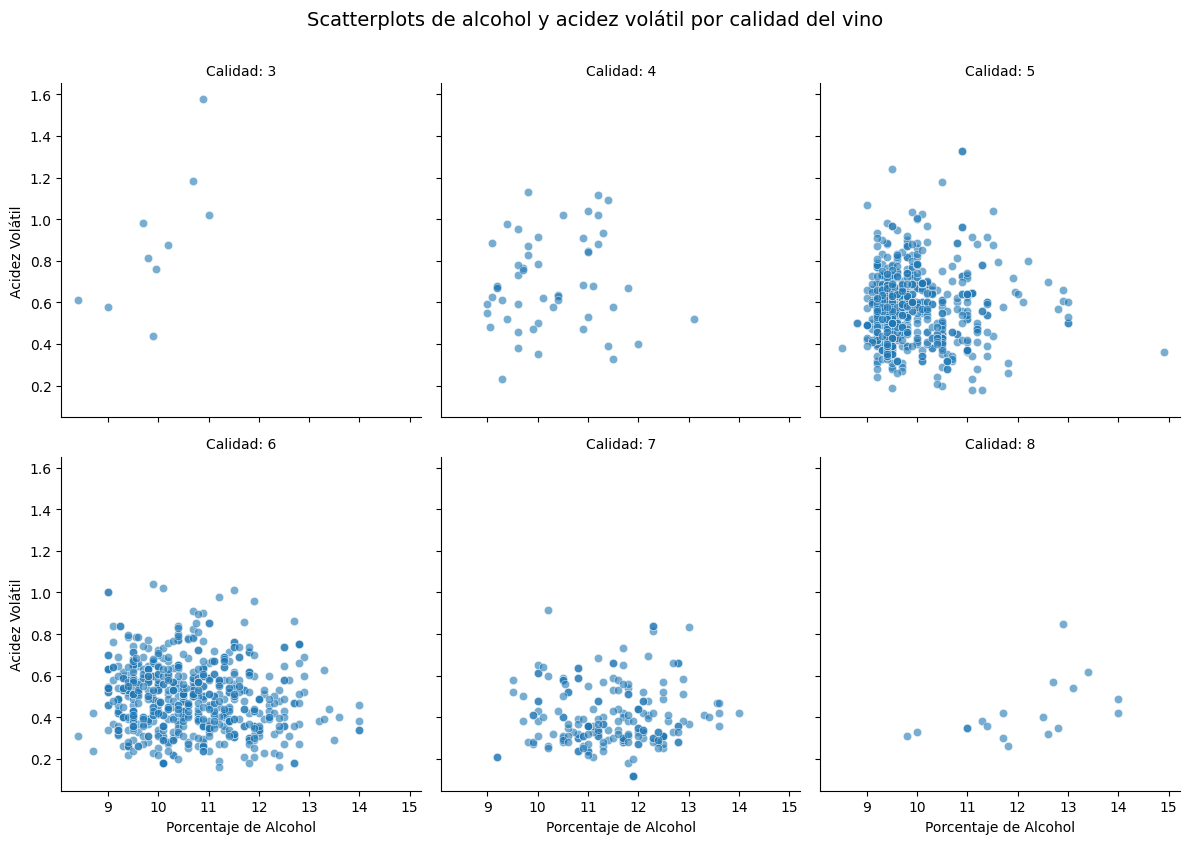

In [ ]:
# Crear una figura con subplots para cada nivel de calidad
g = sns.FacetGrid(
    df,  # DataFrame que contiene los datos
    col="quality",  # Cada subplot representará un nivel único de la columna 'quality'
    col_wrap=3,  # Limitar el número de subplots por fila a 3
    height=4,  # Altura de cada subplot en pulgadas
    sharex=True,  # Compartir el mismo eje X en todos los subplots
    sharey=True  # Compartir el mismo eje Y en todos los subplots
)
# Mapear un gráfico de dispersión (scatterplot) a cada subplot
g.map_dataframe(
    sns.scatterplot,  # Función de visualización para el scatterplot
    x="alcohol",  # Eje X: Porcentaje de alcohol
    y="volatile_acidity",  # Eje Y: Acidez volátil
    alpha=0.6  # Transparencia de los puntos para evitar superposiciones
)

# Ajustar las etiquetas de los ejes
g.set_axis_labels(
    "Porcentaje de Alcohol",  # Etiqueta del eje X
    "Acidez Volátil"  # Etiqueta del eje Y
)

# Ajustar los títulos de cada subplot
g.set_titles(
    col_template="Calidad: {col_name}"  # Títulos dinámicos según el valor de 'quality'
)

# Agregar un título general a toda la figura
plt.suptitle(
    "Scatterplots de alcohol y acidez volátil por calidad del vino",  # Título general
    y=1.05,  # Posición vertical del título para que no se superponga con los subplots
    fontsize=14  # Tamaño de la fuente del título general
)

# Mostrar el gráfico completo
plt.show()